In [89]:
from PIL import Image, ImageOps
import numpy as np
import matplotlib.pyplot as plt
import random
from tabulate import tabulate

# Texture factory creates 2D checkerboards with a transparecy placed on top.
from minimal_example_contrast_metric.texture_factory import TextureFactory

# fixed parameters for the texture factory
n = 21
image_width = 480
block_width = image_width // n

In [2]:
    #def shuffle(a, b, c):
        """""
        Shuffles the luminance values in the array of luminances so that the checkerboard will be randomly ordered.
        
        Parameters
        ----------
        a, b: Any
            values in the array to shuffle
        seed: Any, optional
            Random seed used to initialize the pseudo-random number generator
        
        Example usage
        >>> shuffle(luminace_values[0], luminace_values[i + 1], 12345)
        """""
        

        #rand_state = np.random.RandomState(seed)
        #rand_state.shuffle(a)
        #rand_state.seed(seed)
        #rand_state.shuffle(b)
        
     #   temp = list(zip(a, b, c))
     #   random.shuffle(temp)
     #   res1, res2, res3 = zip(*temp)
     #   # res1 and res2 come out as tuples, and so must be converted to lists.
     #   res1, res2, res3 = list(res1), list(res2), list(res3)
 
        
     #   return res1, res2, res3

[1e-06, 0.75, 0.25, 0.5, 1.0]
[0.2, 0.65, 0.35, 0.5, 0.8]
[0.35, 0.575, 0.425, 0.5, 0.65]


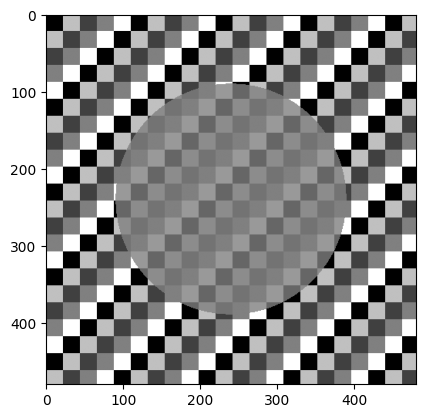

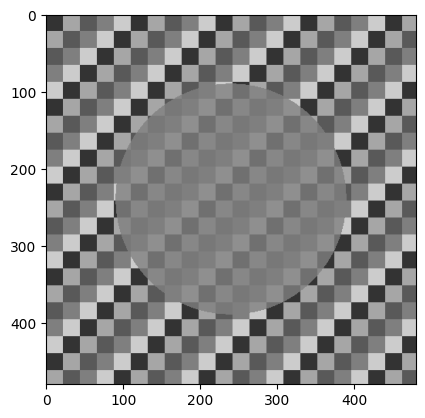

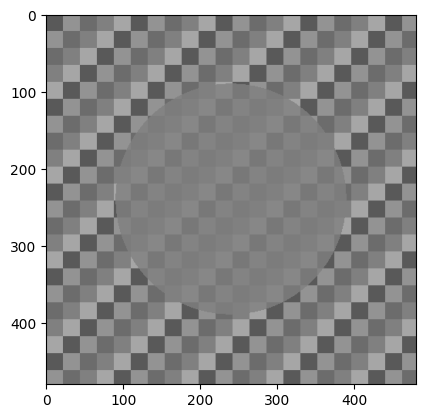

In [3]:
# luminance values are in random order, they are not ordered in an ascending or descending order
bg_luminance_values = [0.000001, 0.75, 0.25, 0.5, 1.0], [0.2, 0.65, 0.35, 0.5, 0.8], [0.35, 0.575, 0.425, 0.5, 0.65] #[0.05, 0.275, 0.5, 0.725, 0.95] , [0.1, 0.3, 0.5, 0.7, 0.9], [0.15, 0.325, 0.5, 0.675, 0.85], [0.2, 0.35, 0.5, 0.65, 0.8], [0.25, 0.375, 0.5, 0.625, 0.75], \[0.3, 0.4, 0.5, 0.6, 0.7], [0.35, 0.425, 0.5, 0.575, 0.65], [0.4, 0.45, 0.5, 0.55, 0.6], [0.45,0.475,0.5,0.525,0.55]
tau_value = 0.5   # 0.0, 0.2, 0.5, 1.0
alpha_value = 0.2  # 0.1, 0.2, 0.5




images = []

for luminance in bg_luminance_values:


    f = TextureFactory('random',
                       block_width=block_width, 
                       image_width=image_width,
                       luminance_values=luminance)

    # here we ask the factory to give us different background contrasts with constant alpha and tau values.
    im = f.get_image(tau_value, alpha_value, bg_luminance=None)
    plt.figure()
    plt.imshow(im, cmap='gray', vmin=0, vmax=1)
    # print('array size', im.shape)

    # we need to convert array to PIL and use PIL library to save. MATPLOTLIB is not reliable when saving images
    # as it can add unwanted borders
    im = Image.fromarray(im*255).convert('L')
    # created images are added to images list
    images.append(im)
    print(luminance)
    #im.save('im_{}.png'.format(luminance))
    


array size (480, 480)


array([0., 1.])

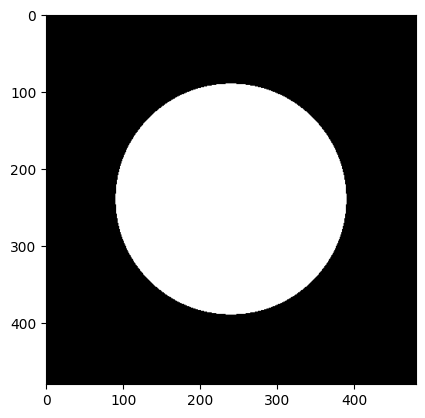

In [4]:
# creating the mask for the inner circle
# getting a checkerboard with a complete white opaque transparecy
f = TextureFactory('checkerboard',block_width=block_width, image_width=image_width,luminance_values= [0, 0, 0, 1, 1])
mask = f.get_image(1, 0, bg_luminance=0.0)

print('array size', mask.shape)
plt.figure()
plt.imshow(mask, cmap='gray', vmin=0, vmax=1)

# saving in case we need it in another notebook 
mask_im = Image.fromarray(mask*255).convert('L')
mask_im.save('mask.png')

np.unique(mask) # should be only 0 and 1 as the mask is binary

[[  0   0   0 ... 191 191 191]
 [  0   0   0 ... 191 191 191]
 [  0   0   0 ... 191 191 191]
 ...
 [191 191 191 ...  63  63  63]
 [191 191 191 ...  63  63  63]
 [191 191 191 ...  63  63  63]]
<class 'numpy.ndarray'>


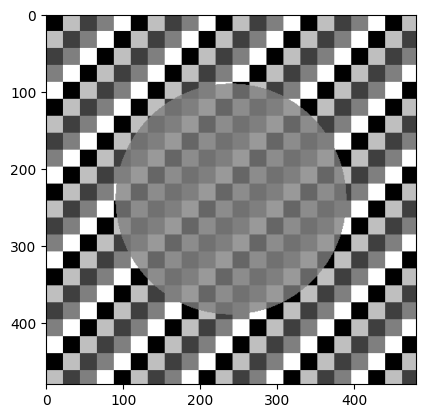

In [88]:
# open an image with a transparency

im = images[0]

# convert to numpy array
im = np.array(im)
print(im)
print(type(im))
plt.imshow(im, cmap='gray')

In [15]:
# now we apply the mask to the numpy array
center = im[mask==1.0]

# center vector has only the values in the transparent region. We now
# get the unique values in it
transp_values = np.unique(center)/255
print('values inside transparent medium:', transp_values.round(2))

# and we do the same for the surround - region without transparency
surr = im[mask==0.0]

surr_values = np.unique(surr)/255
print('values in the background:', surr_values.round(2))

values inside transparent medium: [0.4  0.45 0.5  0.55 0.6 ]
values in the background: [0.   0.25 0.5  0.75 1.  ]


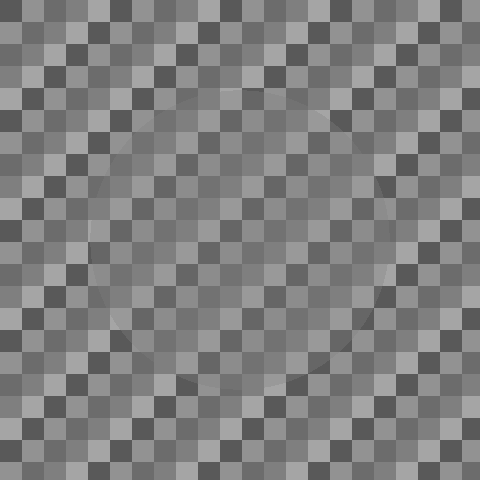

In [13]:
# The transparent media with alpha and tau values on the background with highest contrast
# is cut out and pasted on variegated checkerboards with different background contrasts.

# for luminance in bg_luminance_values:

tm = images[0] # image which transparent medium is taken from
bg = images[2] # image to put it

back_im = bg.copy() 
back_im.paste(tm, (0, 0), mask_im) # replaced 
back_im

In [83]:
# now we calculate the Michelson contrast
def mc(arr):
    return abs((arr.max() - arr.min())/(arr.max() + arr.min()))

# we iterate through all pairs of values out of transparency (in the background)
n = len(surr_values)
contrast_bg_mc = []

# contrast between all possible non-identical pairs
for i in range(n):
    for j in range(i+1, n):
        c = abs(mc(surr_values))
        contrast_bg_mc = c
    
contrast_bg_mc  = np.array(contrast_bg_mc)
print('MC in background: ',contrast_bg_mc.round(2))   






# we now iterate through all pairs of values in transparency 

contrast_transp_mc = []

# contrast between all possible non-identical pairs
for i in range(n):
    for j in range(i+1, n):
        c = abs(mc(transp_values))
        contrast_transp_mc = c
    
contrast_transp_mc  = np.array(contrast_transp_mc)
print('MC inside the transparency: ',contrast_transp_mc.round(2))   


MC in background:  1.0
MC inside the transparency:  0.2


In [95]:
# now we calculate the Space-averaged Michelson contrast as in the paper Aguilar & Maertens (2022)
def michelson_contrast(a, b):
    return abs(a-b)/(a+b)


# we iterate through all pairs of values out of transparency (in the background)
n = len(surr_values)
contrast_bg_sam = []

# contrast between all possible non-identical pairs
for i in range(n):
    for j in range(i+1, n):
        c = abs(michelson_contrast(surr_values[i], surr_values[j]))
        contrast_bg_sam.append(c)
    
contrast_bg_sam  = np.array(contrast_bg_sam)
print(contrast_bg_sam.round(2))   

# we now calculate the log and sum

samlg_bg = np.mean(np.log(contrast_bg))
SAM_contrast_bg = 2 * np.sum(contrast_bg) / (n * n) 
print('SAM in background: ', SAM_contrast_bg.round(3))
print('SAMLG in background: ', samlg_bg.round(3))






# we now iterate through all pairs of values in transparency 

contrast_transp_sam = []

# contrast between all possible non-identical pairs
for i in range(n):
    for j in range(i+1, n):
        c = abs(michelson_contrast(transp_values[i], transp_values[j]))
        contrast_transp_sam.append(c)
    
contrast_transp_sam  = np.array(contrast_transp_sam)
print(contrast_transp_sam.round(2))   

# we now calculate the sum
SAM_contrast_transp = 2 * np.sum(contrast_transp_sam) / (n * n)
print('SAM inside the transparency: ',SAM_contrast_transp.round(3))
samlg_transp = np.mean(np.log(contrast_transp_sam)) # can SAM contrast be lower than zero? 
#print('SAMLG inside the transparency: ', samlg_transp.round(3))



[1.   1.   1.   1.   0.34 0.5  0.6  0.2  0.34 0.14]
SAM in background:  0.49
SAMLG in background:  -0.692
[0.06 0.11 0.16 0.2  0.05 0.1  0.15 0.05 0.09 0.04]
SAM inside the transparency:  0.081


In [84]:
# now we calculate the Space-Average Whittle contrast as in the paper Aguilar & Maertens (2022)

# we iterate through all pairs of values out of transparency (in the background)
contrast_bg_saw = []

# contrast between all possible non-identical pairs
for i in range(n):
    for j in range(i+1, n):
        divisor = surr_values[i] - surr_values[j]
        dividor = min(surr_values[i], surr_values[j])
        dividor = 0.01 if dividor == 0 else dividor
        x = abs(divisor/dividor)
        contrast_bg_saw.append(x)
    
contrast_bg_saw  = np.array(contrast_bg_saw)
print(contrast_bg_saw.round(2))  


SAW_contrast_bg = 2 * np.sum(contrast_bg_saw) / (n * n) 
print('SAW in background: ', SAW_contrast_bg.round(3)) # is the output true? As dividor is in somme cases 0.01 (min), I think there is a problem







# we now iterate through all pairs of values in transparency 

contrast_transp_saw = []

# contrast between all possible non-identical pairs
for i in range(n):
    for j in range(i+1, n):
        divisor = transp_values[i] - transp_values[j]
        dividor = min(transp_values[i], transp_values[j])
        # dividor = 0.0001 if dividor == 0 else dividor 
        x = abs(divisor/dividor)
        contrast_transp_saw.append(x)
    
contrast_transp_saw  = np.array(contrast_transp_saw)
print(contrast_transp_saw.round(2))   

# we now calculate the sum
SAW_contrast_transp = 2 * np.sum(contrast_transp_saw) / (n * n)
print('SAW inside the transparency: ',SAW_contrast_transp.round(3))


[ 24.71  49.8   74.9  100.     1.02   2.03   3.05   0.5    1.01   0.34]
SAW in background:  20.588
[0.12 0.25 0.37 0.5  0.11 0.23 0.34 0.1  0.2  0.09]
SAW inside the transparency:  0.186


In [87]:
# we now calculate the ratio R between the contrasts inside and outside the transparent medium, R = tm_contrast / bg_contrast

# first, we calculate R_mc, being the Ratio between the Michelson contrasts 

# we take calculated contrasts inside and outside the medium
mc_tm = contrast_transp_mc.round(2)
mc_bg = contrast_bg_mc.round(2)

# and calculate the ratio
r_mc = abs(mc_tm/mc_bg)
print('Ratio of TM_mc / BG_mc = ', r_mc)


# second, we calculate R_sam, being the Ratio between the Space-Average Michelson contrasts

# we take calculated contrasts inside and outside the medium
sam_tm = SAM_contrast_transp.round(2)
sam_bg = SAM_contrast_bg.round(2)

# and calculate the ratio
r_sam = abs(sam_tm/sam_bg)
print('Ratio of TM_sam / BG_sam = ', r_sam)



# lastly, we calculate R_saw, being the Ratio between the Space-Average Whittle contrasts

# we take calculated contrasts inside and outside the medium
saw_tm = SAW_contrast_transp.round(2)
saw_bg = SAW_contrast_bg.round(2)

# and calculate the ratio
r_saw = abs(saw_tm/saw_bg)
print('Ratio of TM_saw / BG_saw = ', r_saw)


Ratio of TM_mc / BG_mc =  0.2
Ratio of TM_sam / BG_sam =  0.163265306122449
Ratio of TM_saw / BG_saw =  0.009227780475959204


In [123]:
# create a tabulate to visualize evey value

table = [['Stimuli ID', 'BG Values', 'alpha','tau',
          'MC inside', 'MC background','R_MC', 
          'SAM inside', 'SAM background','R_SAM', 
          'SAMLG inside', 'SAMLG background','R_SAMLG', 
          'SAW inside', 'SAW background','R_SAW'], 
         [0, surr_values.round(2), alpha_value, tau_value,
          contrast_transp_mc.round(2), contrast_bg_mc.round(2),r_mc.round(2), 
          SAM_contrast_transp.round(2), SAM_contrast_bg.round(2),r_sam.round(2), 
          samlg_transp.round(2), samlg_bg.round(2),'Ratio SAMLG', 
          SAW_contrast_transp.round(2), SAW_contrast_bg.round(2),r_saw.round(2)]]

table = tabulate(table, headers='firstrow', tablefmt='fancy_grid')

# the table is saved
with open('table.txt', 'w') as f:
  f.write(table)